In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [99]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

# Loading Dataset

In [100]:
house_data = pd.read_csv('kc_house_data_small.csv',dtype=dtype_dict)
house_data_train = pd.read_csv('kc_house_data_small_train.csv',dtype = dtype_dict)
house_data_test = pd.read_csv('kc_house_data_small_test.csv',dtype= dtype_dict)
house_data_val = pd.read_csv('kc_house_data_validation.csv',dtype= dtype_dict)
print(house_data.shape,house_data_train.shape,house_data_test.shape,house_data_val.shape)

(8703, 21) (5527, 21) (1741, 21) (1435, 21)


In [101]:
def get_numpy_data(dataset,features,output):
    dataset['constant'] = 1
    features.insert(0,'constant')
    X = np.array(dataset[features])
    Y = np.array(dataset[output]).reshape(-1,1)
    features.remove('constant')
    return X,Y
    

In [102]:
def normalize_features(features):
    norms = np.linalg.norm(features, axis=0)
    features_normalized = features/norms
    return features_normalized,norms

In [103]:
house_data_test

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9297300055,20150124T000000,650000.0,4.0,3.00,2950.0,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140.0,4000.0
1,6865200140,20140529T000000,485000.0,4.0,1.00,1600.0,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610.0,4300.0
2,5101402488,20140624T000000,438000.0,3.0,1.75,1520.0,6380,1.0,0,0,...,7,790,730,1948,0,98115,47.6950,-122.304,1520.0,6235.0
3,7589200193,20141110T000000,535000.0,3.0,1.00,1090.0,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570.0,5080.0
4,4178300310,20140716T000000,785000.0,4.0,2.50,2290.0,13416,2.0,0,0,...,9,2290,0,1981,0,98007,47.6194,-122.151,2680.0,13685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,9521100867,20140711T000000,475000.0,3.0,3.25,1380.0,1121,3.0,0,0,...,8,1380,0,2008,0,98103,47.6617,-122.349,1310.0,1405.0
1737,2625069038,20141124T000000,1450000.0,4.0,3.50,4300.0,108865,2.0,0,0,...,11,4300,0,2014,0,98074,47.6258,-122.005,4650.0,107498.0
1738,8562780180,20140612T000000,336750.0,2.0,2.25,1170.0,1011,2.0,0,0,...,7,1170,0,2009,0,98027,47.5321,-122.073,1240.0,750.0
1739,3345700207,20150502T000000,608500.0,4.0,3.50,2850.0,5577,2.0,0,0,...,8,1950,900,2014,0,98056,47.5252,-122.192,2850.0,5708.0


In [104]:
feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

In [105]:
X_train,Y_train = get_numpy_data(house_data_train,feature_list,['price'])
X_test,Y_test = get_numpy_data(house_data_test,feature_list,['price'])
X_val,Y_val = get_numpy_data(house_data_val,feature_list,['price'])
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,X_val.shape,Y_val.shape)

(5527, 18) (5527, 1) (1741, 18) (1741, 1) (1435, 18) (1435, 1)


In [106]:
X_train_norm,norms_train = normalize_features(X_train)
X_test_norm = X_test/norms_train
X_val_norm = X_val/norms_train
print(X_train_norm.shape,X_test_norm.shape)

(5527, 18) (1741, 18)


# Computing Distance

In [107]:
print(X_test_norm[0])
print(X_test_norm[0].shape)
print(X_train_norm[9])
print(X_train_norm[9].shape)

[ 0.01345102  0.01551285  0.01807473  0.01759212  0.00160518  0.017059
  0.          0.05102365  0.0116321   0.01564352  0.01362084  0.02481682
  0.01350306  0.          0.01345387 -0.01346922  0.01375926  0.0016225 ]
(18,)
[ 0.01345102  0.01163464  0.00602491  0.0083488   0.00050756  0.01279425
  0.          0.          0.01938684  0.01390535  0.0096309   0.
  0.01302544  0.          0.01346821 -0.01346251  0.01195898  0.00156612]
(18,)


In [108]:
np.sqrt(np.sum(np.square(X_test_norm[0] - X_train_norm[9])))

0.05972359371398078

# Calculating Distance

In [109]:
query_point = X_test_norm[0]
distances = []
for point in X_train_norm[0:10]:
    distances.append(np.sqrt(np.sum(np.square(query_point - point))))
distances
    

[0.06027470916295592,
 0.08546881147643746,
 0.06149946435279315,
 0.05340273979294363,
 0.05844484060170442,
 0.059879215098128345,
 0.05463140496775461,
 0.055431083236146074,
 0.052383627840220305,
 0.05972359371398078]

In [110]:
min(distances)

0.052383627840220305

# 1-NN Regression

In [163]:
query_point = X_test_norm[0]
distances = []
for point in X_train_norm:
    distances.append(np.sqrt(np.sum(np.square(query_point - point))))

    

In [164]:
distances[100]

0.023708232416678195

In [190]:
def compute_distances(query_point,X):
    distance = []
    
    distance.append(np.sqrt(np.sum(np.square(query_point - X),axis=1)))
    return np.array(distance)


In [169]:
a = np.array([[1,2],[3,4],[15,26]])
b = np.array([1,2])
print(a-b)
print(np.square(a - b))
print(np.sum(np.square(a - b),axis=-1))


[[ 0  0]
 [ 2  2]
 [14 24]]
[[  0   0]
 [  4   4]
 [196 576]]
[  0   8 772]


In [191]:
np.argmin(compute_distances(query_point = X_test_norm[2],X = X_train_norm))

382

In [175]:
Y_train[382]

array([249000.])

# K-NN

In [196]:
def k_nearest_neighbors(k,query_point,features):
    distances = compute_distances(query_point,features)
    #print(distances.shape)
    return np.argsort(distances)[:,:k]
        
    

In [197]:
k_nearest_neighbors(k=4,query_point = X_test_norm[2],features = X_train_norm)

array([[ 382, 1149, 4087, 3142]])

In [198]:
def k_nn_prediction(k,query_point,features,output):
    k_houses_indices = k_nearest_neighbors(k,query_point,features)
    k_houses_prices = []
    for i in k_houses_indices:
        k_houses_prices.append(output[i])
    return np.mean(k_houses_prices)
    

In [199]:
k_nn_prediction(4,X_test_norm[2],X_train_norm,Y_train)

413987.5

In [200]:
def k_nn_regression(k,query_features,features,output):
    Y_pred = []
    for query_point in query_features:
        k_houses_indices = k_nearest_neighbors(k,query_point,features)
        k_houses_prices = []
        for i in k_houses_indices:
            k_houses_prices.append(output[i])
        Y_pred.append(np.mean(k_houses_prices))
    return Y_pred
    

In [201]:
Y_pred = k_nn_regression(10,X_test_norm[:10],X_train_norm,Y_train)

In [202]:
Y_pred

[881300.0,
 431860.0,
 460595.0,
 430200.0,
 766750.0,
 667420.0,
 350032.0,
 512800.7,
 484000.0,
 457235.0]

In [203]:
np.min(Y_pred)

350032.0

# Best Value of k

In [206]:
rss = {}
for k in range(1,16):
    Y_pred = k_nn_regression(k,X_val_norm,X_train_norm,Y_train)
    Y_pred = np.array(Y_pred).reshape(-1,1)
    #Y_pred = Y_pred.reshape(-1,1)
    rss[str(k)] = np.sum(np.square(Y_val - Y_pred))
    

In [207]:
rss

{'1': 105453830251561.0,
 '2': 83445073504025.5,
 '3': 72692096019202.56,
 '4': 71946721652091.69,
 '5': 69846517419718.6,
 '6': 68899544353180.836,
 '7': 68341973450051.09,
 '8': 67361678735491.5,
 '9': 68372727958976.09,
 '10': 69335048668556.74,
 '11': 69523855215598.83,
 '12': 69049969587246.17,
 '13': 70011254508263.69,
 '14': 70908698869034.34,
 '15': 71106928385945.16}

In [209]:
np.min(list(rss.values()))

67361678735491.5

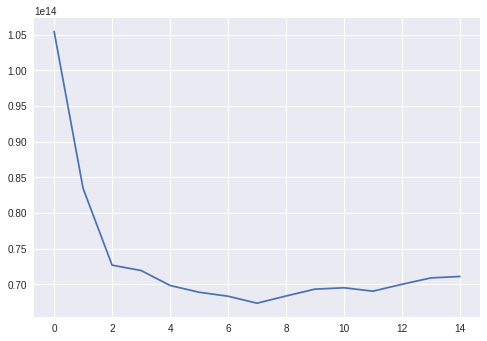

In [212]:
k = np.arange(1,16,1)
plt.plot(list(rss.values()))
plt.show()

# Questions
8. Quiz Question: What is the Euclidean distance between the query house and the 10th house of the training set?
##### ANS: 0.05972359371398078
10. Quiz Question: Among the first 10 training houses, which house is the closest to the query house?
##### ANS: 9th house(8th index) . distance = 0.052383627840220305
16. Quiz Question: Take the query house to be third house of the test set (features_test[2]). What is the index of the house in the training set that is closest to this query house?
##### ANS: 382 
17. Quiz Question: What is the predicted value of the query house based on 1-nearest neighbor regression?
##### ANS: 249000
19. Quiz Question: Take the query house to be third house of the test set (features_test[2]). What are the indices of the 4 training houses closest to the query house?
##### ANS: 382, 1149, 4087, 3142
21. Quiz Question: Again taking the query house to be third house of the test set (features_test[2]), predict the value of the query house using k-nearest neighbors with k=4 and the simple averaging method described and implemented above.
##### ANS: 413987.5
23. Quiz Question: Make predictions for the first 10 houses in the test set, using k=10. What is the index of the house in this query set that has the lowest predicted value? What is the predicted value of this house?
##### ANS: 6 -> 350032.0
25. Quiz Question: What is the RSS on the TEST data using the value of k found above? To be clear, sum over all houses in the TEST set.
##### ANS: 67361678735491.5 

In [217]:
np.round(413987.5,0)

413988.0